In [1]:
# Import Libraries for Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# File and Data Description

'''
1.Loading the dataset
2.Getting information about the dataset
'''

data_path = "./data/daily-website-visitors.csv"
df = pd.read_csv(data_path)

In [1]:
# Displaying Datasets Information
df.info()   

NameError: name 'df' is not defined

In [4]:
# Data preprocessing

'''
1.Convert Date into Datetime format.
2.Removing comma from Page.Loads, Unique.Visits, First.Time.Visits, Returning.Visits.
3.Convert each column's value to float.
4. Renaming each column
5. Cleaning Duplicated Data
'''

# Function to remove commas
def comma_elim(x):
    return float(x.replace(',', ''))

In [5]:
# Apply the preprocessing functions

df['Date'] = pd.to_datetime(df['Date'])
df['Page.Loads'] = df['Page.Loads'].apply(lambda x : comma_elim(x))
df['Unique.Visits'] = df['Unique.Visits'].apply(lambda x : comma_elim(x))
df['First.Time.Visits'] = df['First.Time.Visits'].apply(lambda x : comma_elim(x))
df['Returning.Visits'] = df['Returning.Visits'].apply(lambda x : comma_elim(x))

In [6]:
# Renaming the Columns
df = df.rename(columns={
                        "Day.Of.Week":"Day of Week",  
                        "Page.Loads":"Page Loads", 
                        "Unique.Visits":"Unique Visits",
                        "First.Time.Visits":"First Time Visits",
                        "Returning.Visits":"Returning Visits"
                        })

In [7]:
# Checking Duplicated Data (Data Cleaning)
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 8)


In [8]:
# If the data is duplicated, remove the duplicate
if  df.duplicated().sum() > 0: 
    df = df.drop_duplicates()
    df.head()
    
# Checking current data
df.count() 

Row                  2167
Day                  2167
Day of Week          2167
Date                 2167
Page Loads           2167
Unique Visits        2167
First Time Visits    2167
Returning Visits     2167
dtype: int64

In [9]:
# Data charateristics

'''
1. Sorting data by Date
2. Determining the range, minimum, and maximum value of each column
3. Finding null data
'''

# Sorting Data by Datetime
df.sort_values(by='Date', ascending=True)

,Row,Day,Day of Week,Date,Page Loads,Unique Visits,First Time Visits,Returning Visits
0,1,Sunday,1,2014-09-14,2146.0,1582.0,1430.0,152.0
1,2,Monday,2,2014-09-15,3621.0,2528.0,2297.0,231.0
2,3,Tuesday,3,2014-09-16,3698.0,2630.0,2352.0,278.0
3,4,Wednesday,4,2014-09-17,3667.0,2614.0,2327.0,287.0
4,5,Thursday,5,2014-09-18,3316.0,2366.0,2130.0,236.0
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,2020-08-15,2221.0,1696.0,1373.0,323.0
2163,2164,Sunday,1,2020-08-16,2724.0,2037.0,1686.0,351.0
2164,2165,Monday,2,2020-08-17,3456.0,2638.0,2181.0,457.0
2165,2166,Tuesday,3,2020-08-18,3581.0,2683.0,2184.0,499.0


In [10]:
# Determining Maximum, Minimum, and Range of each parameter inside datasets
data = {'Range':[],'Maximum':[], 'Minimum':[]}
cols = ['Page Loads', 'Unique Visits', 'First Time Visits', 'Returning Visits']

for i, col in enumerate(cols):
    max_value = df[col].max()
    min_value = df[col].min()
    range = max_value - min_value
    
    data['Range'].append(range) 
    data['Maximum'].append(max_value)
    data['Minimum'].append(min_value)
    
dn = pd.DataFrame(data,index=cols)
dn.head()     

,Range,Maximum,Minimum
Page Loads,6982.0,7984.0,1002.0
Unique Visits,4874.0,5541.0,667.0
First Time Visits,4094.0,4616.0,522.0
Returning Visits,903.0,1036.0,133.0


In [11]:
# Finding Null Value inside the datasets
df.isna().sum()

Row                  0
Day                  0
Day of Week          0
Date                 0
Page Loads           0
Unique Visits        0
First Time Visits    0
Returning Visits     0
dtype: int64

In [82]:
# Statistics

'''
1. Sampling n-largest data by column where n = 70
2. Determining Statistics for each attributes (Percentiles, Maximum, Minimum)
'''
n = 70
# Sorting dataset values by date
subset = df.sample(n).sort_values("Date", ascending='True')


In [138]:
#  Sample
subset

,Row,Day,Day of Week,Date,Page Loads,Unique Visits,First Time Visits,Returning Visits
24,25,Wednesday,4,2014-10-08,4187.0,3014.0,2663.0,351.0
51,52,Tuesday,3,2014-11-04,4704.0,3141.0,2739.0,402.0
89,90,Friday,6,2014-12-12,3880.0,2860.0,2418.0,442.0
95,96,Thursday,5,2014-12-18,3691.0,2690.0,2275.0,415.0
106,107,Monday,2,2014-12-29,2173.0,1472.0,1228.0,244.0
...,...,...,...,...,...,...,...,...
2096,2097,Wednesday,4,2020-06-10,4989.0,3857.0,3269.0,588.0
2108,2109,Monday,2,2020-06-22,4627.0,3493.0,2935.0,558.0
2111,2112,Thursday,5,2020-06-25,4137.0,3215.0,2668.0,547.0
2139,2140,Thursday,5,2020-07-23,3823.0,3033.0,2525.0,508.0


In [119]:
# Showing the statistics of the dataset
print("10% percentile of each dataset")
percentile_10 = { "Page Loads": [np.percentile(df['Page Loads'], 10)],
                 "Unique Visits": [np.percentile(df['Unique Visits'], 10)],
                 "First Time Visits": [np.percentile(df['First Time Visits'], 10)],
                 "Returning Visits": [np.percentile(df['Returning Visits'], 10)]}
pd.DataFrame(data=percentile_10)

10% percentile of each dataset


,Page Loads,Unique Visits,First Time Visits,Returning Visits
0,2300.4,1633.6,1326.2,283.0


In [120]:
# Showing the statistics of the dataset
print("25% percentile of each dataset")
percentile_25 = { "Page Loads": [np.percentile(df['Page Loads'], 25)],
                 "Unique Visits": [np.percentile(df['Unique Visits'], 25)],
                 "First Time Visits": [np.percentile(df['First Time Visits'], 25)],
                 "Returning Visits": [np.percentile(df['Returning Visits'], 25)]}
pd.DataFrame(data=percentile_25)

25% percentile of each dataset


,Page Loads,Unique Visits,First Time Visits,Returning Visits
0,3114.5,2226.0,1830.0,388.5


In [121]:
# Showing the statistics of the dataset
print("50% percentile of each dataset")
percentile_50 = { "Page Loads": [np.percentile(df['Page Loads'], 50)],
                 "Unique Visits": [np.percentile(df['Unique Visits'], 50)],
                 "First Time Visits": [np.percentile(df['First Time Visits'], 50)],
                 "Returning Visits": [np.percentile(df['Returning Visits'], 50)]}
pd.DataFrame(data=percentile_50)

50% percentile of each dataset


,Page Loads,Unique Visits,First Time Visits,Returning Visits
0,4106.0,2914.0,2400.0,509.0


In [122]:
# Showing the statistics of the dataset
print("75% percentile of each dataset")
percentile_75 = { "Page Loads": [np.percentile(df['Page Loads'], 75)],
                 "Unique Visits": [np.percentile(df['Unique Visits'], 75)],
                 "First Time Visits": [np.percentile(df['First Time Visits'], 75)],
                 "Returning Visits": [np.percentile(df['Returning Visits'], 75)]}
pd.DataFrame(data=percentile_75)

75% percentile of each dataset


,Page Loads,Unique Visits,First Time Visits,Returning Visits
0,5020.5,3667.5,3038.0,626.5


In [123]:
# Showing the statistics of the dataset
print("90% percentile of each dataset")
percentile_90 = { "Page Loads": [np.percentile(df['Page Loads'], 90)],
                 "Unique Visits": [np.percentile(df['Unique Visits'], 90)],
                 "First Time Visits": [np.percentile(df['First Time Visits'], 90)],
                 "Returning Visits": [np.percentile(df['Returning Visits'], 90)]}
pd.DataFrame(data=percentile_90)

90% percentile of each dataset


,Page Loads,Unique Visits,First Time Visits,Returning Visits
0,5906.8,4252.2,3550.8,731.0


In [136]:
print("Maximum Value of each attributes")
maxima =  df[['Page Loads','Unique Visits','First Time Visits','Returning Visits']]
print(maxima.max())

Maximum Value of each attributes
Page Loads           7984.0
Unique Visits        5541.0
First Time Visits    4616.0
Returning Visits     1036.0
dtype: float64


In [135]:
print("Minimum Value of each attributes")
maxima =  df[['Page Loads','Unique Visits','First Time Visits','Returning Visits']]
print(maxima.min())

Minimum Value of each attributes
Page Loads           1002.0
Unique Visits         667.0
First Time Visits     522.0
Returning Visits      133.0
dtype: float64


In [137]:
# Showing the whole statistics of the sample
subset.describe(datetime_is_numeric=True)

,Row,Day of Week,Date,Page Loads,Unique Visits,First Time Visits,Returning Visits
count,70.000000,70.000000,70,70.000000,70.000000,70.000000,70.000000
mean,1217.728571,3.928571,2018-01-12 17:29:08.571428608,4128.228571,2981.357143,2470.514286,510.842857
min,25.000000,1.000000,2014-10-08 00:00:00,1300.000000,895.000000,712.000000,176.000000
25%,696.250000,2.250000,2016-08-09 06:00:00,3258.500000,2271.750000,1844.000000,405.000000
50%,1347.500000,4.000000,2018-05-22 12:00:00,4149.000000,3010.500000,2480.000000,509.500000
75%,1734.750000,5.750000,2019-06-13 18:00:00,4933.500000,3674.000000,3100.750000,597.500000
max,2145.000000,7.000000,2020-07-28 00:00:00,7218.000000,5047.000000,4167.000000,902.000000
std,655.943527,1.951004,NaN,1295.457696,957.641033,813.070807,162.792625


In [104]:
# Data Visualization

'''
1.  Average Value of each Attributes by Day 
2.  Total Sum of each Attributes by Day
3.  Development of each attributes by Date in the sample
4.  Plotting the correlation heatmap
5.  Plotting frequency distribution from the sample data
'''

subset.info()
day_grouped_data = df.groupby('Day')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 24 to 2144
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row                70 non-null     int64         
 1   Day                70 non-null     object        
 2   Day of Week        70 non-null     int64         
 3   Date               70 non-null     datetime64[ns]
 4   Page Loads         70 non-null     float64       
 5   Unique Visits      70 non-null     float64       
 6   First Time Visits  70 non-null     float64       
 7   Returning Visits   70 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 4.9+ KB


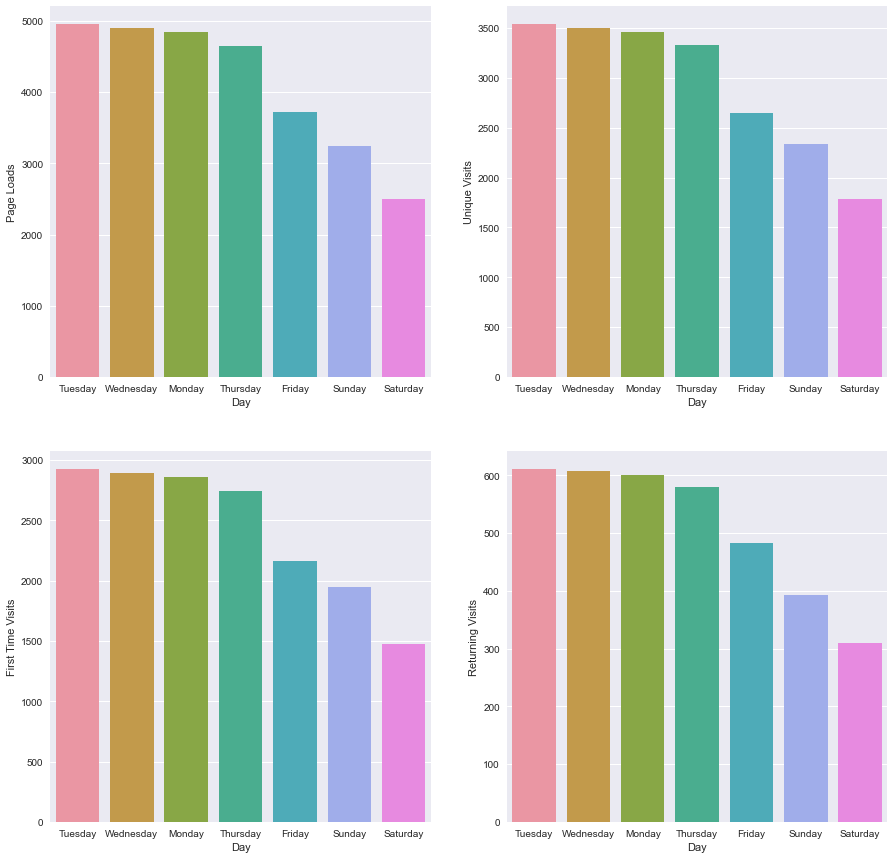

In [105]:
avg_day_data = day_grouped_data.mean().reset_index().drop('Row', axis=1)
# Plot the Bargraph for every continuous variable across day
cols_to_plot = ['Page Loads', 'Unique Visits', 'First Time Visits', 'Returning Visits']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i+1)
    sns.barplot(data=avg_day_data.sort_values(by=col, ascending=False), x='Day', y=col)

<AxesSubplot:title={'center':'Total Sum of each Attributes by Day'}, xlabel='Day', ylabel='Sum'>

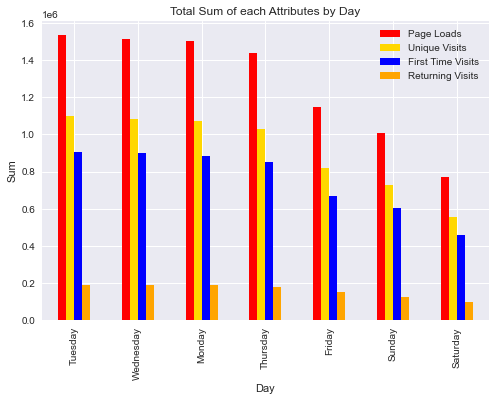

In [106]:
# Total Sum of each Attributes by Day

sums=df.groupby(['Day'])[['Page Loads', 'Unique Visits', 'First Time Visits', 'Returning Visits']].sum().sort_values(
    by='Unique Visits',ascending=False)
sums.plot( kind='bar',color=['red', 'gold', 'blue','orange'], title='Total Sum of each Attributes by Day', ylabel='Sum')

C:\Users\gassa\AppData\Local\Temp/ipykernel_140/3120110945.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


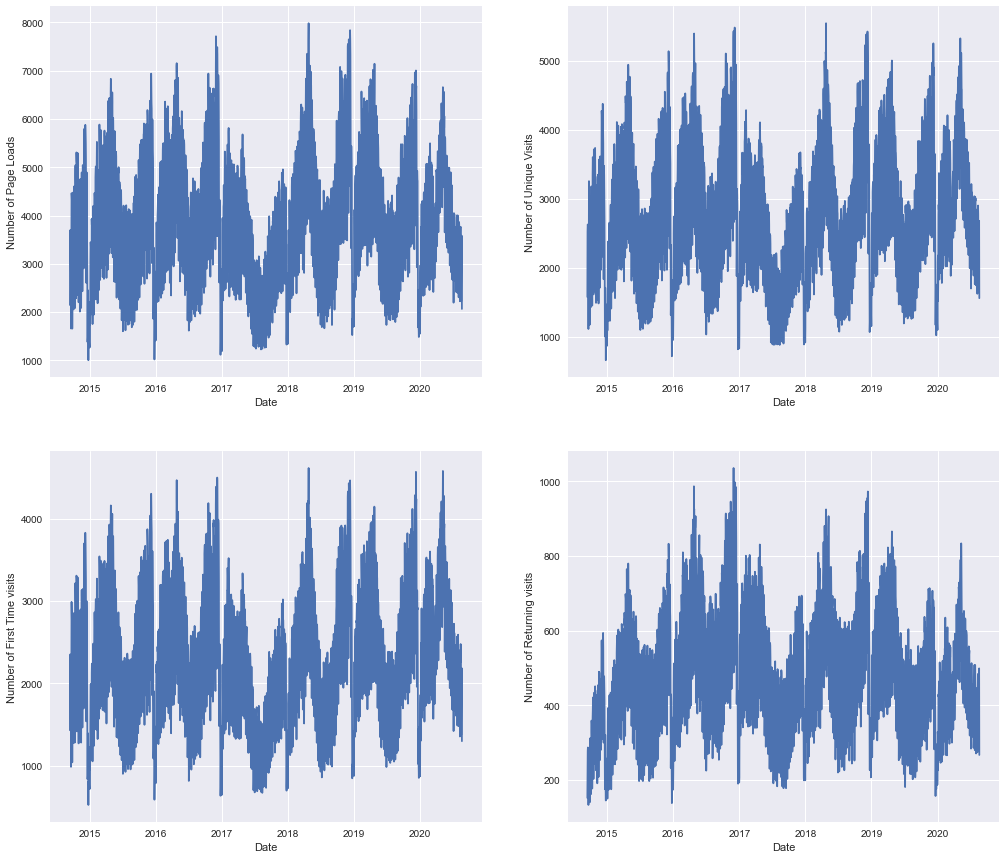

In [108]:
# Development of each attributes by Date

figure, ax = plt.subplots(2, 2, figsize=(17, 15))
plt.style.use('seaborn')

ax1 = ax[0]
ax2 = ax[1]

# Plot the Number of Page Loads with time
ax1[0].plot(df['Date'], df['Page Loads'])
ax1[0].set_xlabel("Date")
ax1[0].set_ylabel("Number of Page Loads")

# Plot the Number of Unique Visits with time
ax1[1].plot(df['Date'], df['Unique Visits'])
ax1[1].set_xlabel("Date")
ax1[1].set_ylabel("Number of Unique Visits")

# Plot the Number of First Time visits with time
ax2[0].plot(df['Date'], df['First Time Visits'])
ax2[0].set_xlabel("Date")
ax2[0].set_ylabel("Number of First Time visits")

# Plot the Number of Returning visits with time
ax2[1].plot(df['Date'], df['Returning Visits'])
ax2[1].set_xlabel("Date")
ax2[1].set_ylabel("Number of Returning visits")

figure.show()

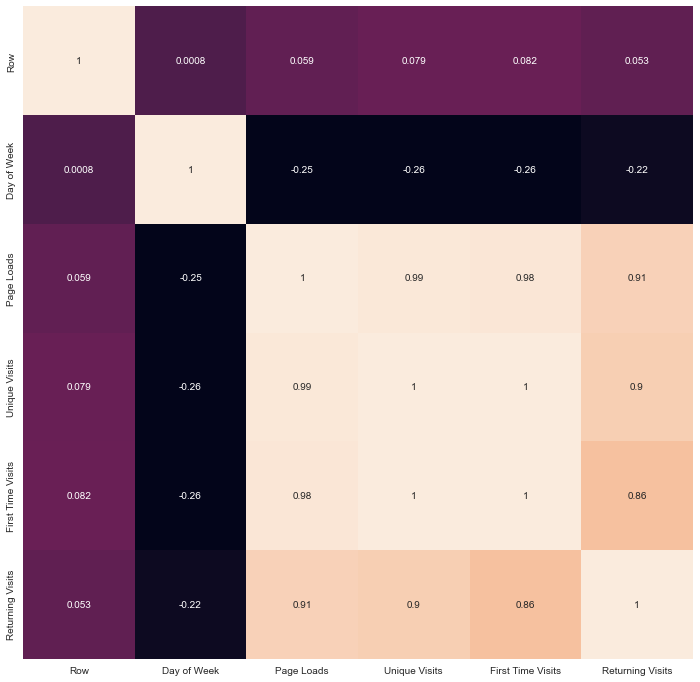

In [109]:
# Plot the correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.show()

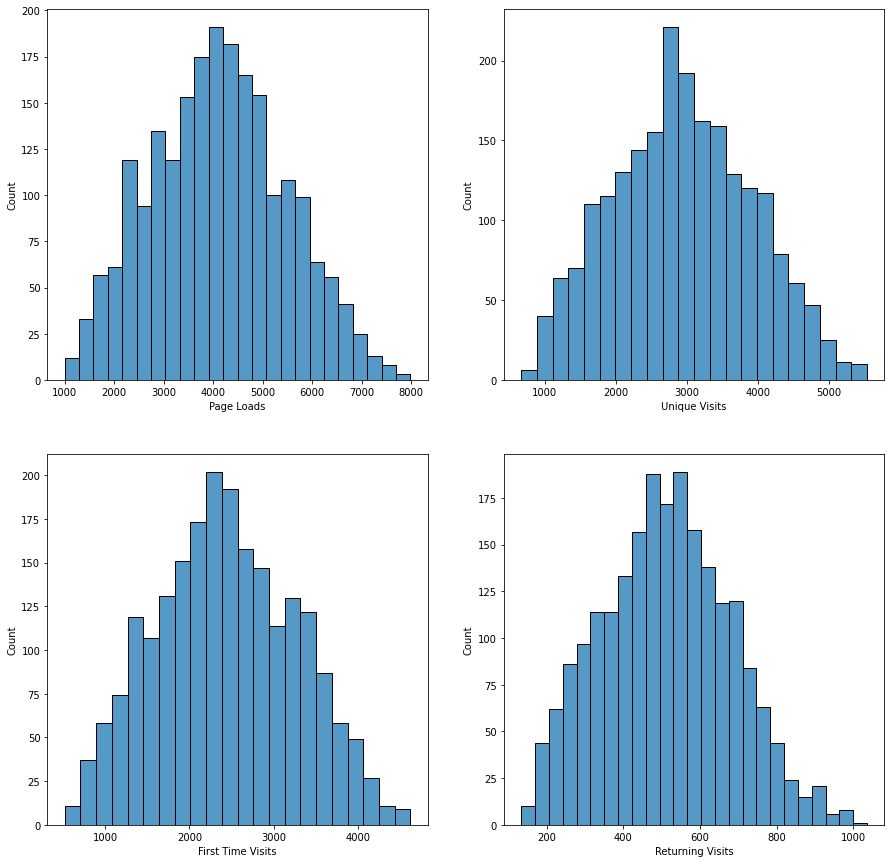

In [19]:
# Frequency of values of each colums in the dataset
cols_to_plot = ['Page Loads', 'Unique Visits', 'First Time Visits', 'Returning Visits']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=col)

In [146]:
# Correlation

'''
1. Heatmap for correlation of each attributes
2. Scatter Plot for correlation of each attributes to Page Loads
'''
print("Correlation table of each column")
df.corr(method = 'pearson')


Tabel korelasi antar kolom


,Row,Day of Week,Page Loads,Unique Visits,First Time Visits,Returning Visits
Row,1.000000,0.000800,0.059412,0.078944,0.082316,0.053233
Day of Week,0.000800,1.000000,-0.253006,-0.255127,-0.256785,-0.217418
Page Loads,0.059412,-0.253006,1.000000,0.988691,0.980704,0.913340
Unique Visits,0.078944,-0.255127,0.988691,1.000000,0.996164,0.902950
First Time Visits,0.082316,-0.256785,0.980704,0.996164,1.000000,0.861882
Returning Visits,0.053233,-0.217418,0.913340,0.902950,0.861882,1.000000


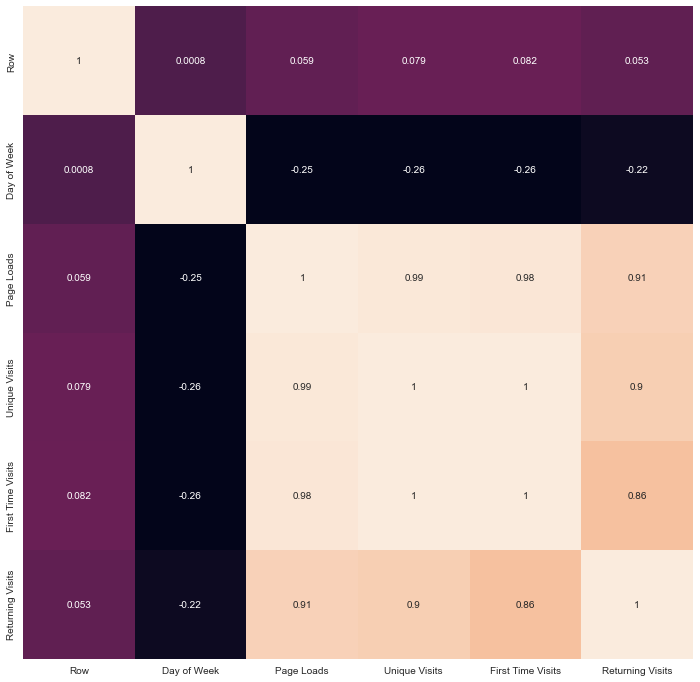

In [152]:
# correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.show()

Relationship Between Page Loads and Returning Visits


<function matplotlib.pyplot.show(close=None, block=None)>

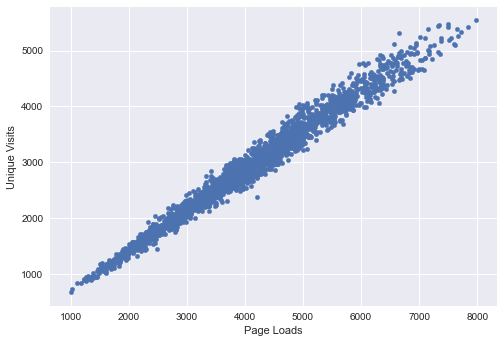

In [145]:
print("Relationship Between Page Loads and Unique Visits")
df.plot.scatter(x="Page Loads", y="Unique Visits")
plt.show

Relationship Between Page Loads and Returning Visits


<function matplotlib.pyplot.show(close=None, block=None)>

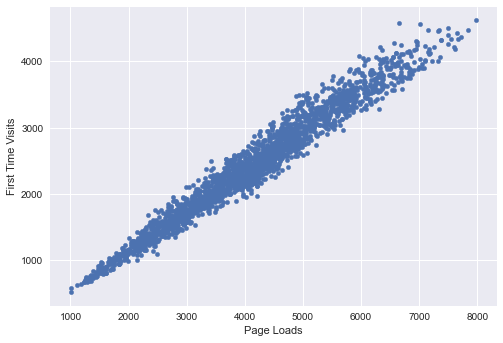

In [143]:
print("Relationship Between Page Loads and First Time Visits")
df.plot.scatter(x="Page Loads", y="First Time Visits")
plt.show

Relationship Between Page Loads and Returning Visits


<function matplotlib.pyplot.show(close=None, block=None)>

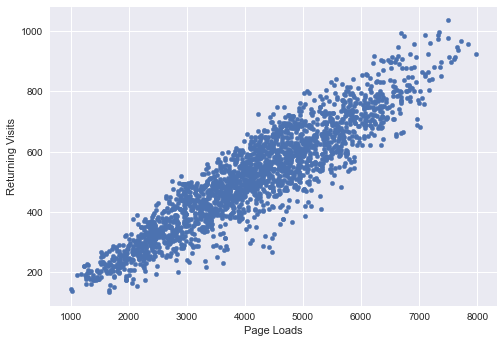

In [144]:
print("Relationship Between Page Loads and Returning Visits")
df.plot.scatter(x="Page Loads", y="Returning Visits")
plt.show